### Importa√ß√£o dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [12]:
# Calculando o faturamento total de cada loja
# A fun√ß√£o .sum() soma todos os valores da coluna 'Pre√ßo'
faturamentos = {
    "Loja 1": loja['Pre√ßo'].sum(),
    "Loja 2": loja2['Pre√ßo'].sum(),
    "Loja 3": loja3['Pre√ßo'].sum(),
    "Loja 4": loja4['Pre√ßo'].sum()
}

# Transformando os dados em um DataFrame para melhor visualiza√ß√£o
df_faturamento = pd.DataFrame(
    list(faturamentos.items()),
    columns=['Loja', 'Faturamento']
)

# Exibindo o resultado
print(df_faturamento)

     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


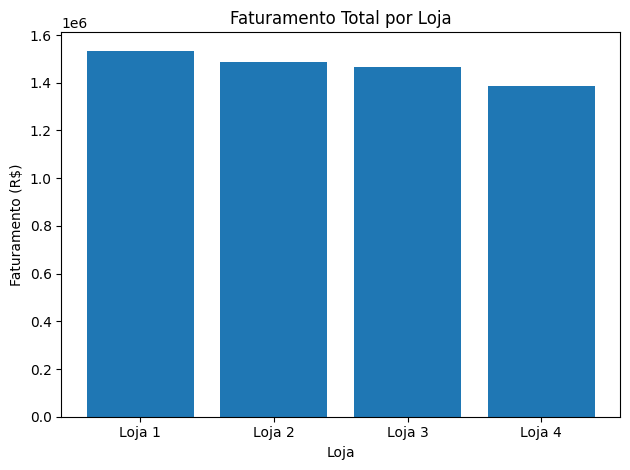

In [13]:
import matplotlib.pyplot as plt

plt.bar(df_faturamento["Loja"], df_faturamento["Faturamento"])
plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [20]:
# 2. Vendas por Categoria

# Contando as vendas por categoria em cada loja
cat_loja1 = loja["Categoria do Produto"].value_counts().reset_index()
cat_loja2 = loja2["Categoria do Produto"].value_counts().reset_index()
cat_loja3 = loja3["Categoria do Produto"].value_counts().reset_index()
cat_loja4 = loja4["Categoria do Produto"].value_counts().reset_index()

# Renomeando colunas para exibi√ß√£o
cat_loja1.columns = ["Categoria", "Quantidade - Loja 1"]
cat_loja2.columns = ["Categoria", "Quantidade - Loja 2"]
cat_loja3.columns = ["Categoria", "Quantidade - Loja 3"]
cat_loja4.columns = ["Categoria", "Quantidade - Loja 4"]

# Exibindo a contagem da Loja 1
print("Loja 1 - Vendas por Categoria")
display(categorias_loja1)

# Exibe o resultado da Loja 2
print("Loja 2 - Vendas por Categoria")
display(categorias_loja2)

# Exibe o resultado da Loja 3
print("Loja 3 - Vendas por Categoria")
display(categorias_loja3)

# Exibe o resultado da Loja 4
print("Loja 4 - Vendas por Categoria")
display(categorias_loja4)

Loja 1 - Vendas por Categoria


Categoria  Quantidade Vendida - Loja 1
0                 moveis                          465
1            eletronicos                          448
2             brinquedos                          324
3       eletrodomesticos                          312
4        esporte e lazer                          284
5  instrumentos musicais                          182
6                 livros                          173
7  utilidades domesticas                          171

Loja 2 - Vendas por Categoria


Categoria  Quantidade Vendida - Loja 2
0                 moveis                          442
1            eletronicos                          422
2             brinquedos                          313
3       eletrodomesticos                          305
4        esporte e lazer                          275
5  instrumentos musicais                          224
6                 livros                          197
7  utilidades domesticas                          181

Loja 3 - Vendas por Categoria


Categoria  Quantidade Vendida - Loja 3
0                 moveis                          499
1            eletronicos                          451
2             brinquedos                          315
3       eletrodomesticos                          278
4        esporte e lazer                          277
5                 livros                          185
6  instrumentos musicais                          177
7  utilidades domesticas                          177

Loja 4 - Vendas por Categoria


Categoria  Quantidade Vendida - Loja 4
0                 moveis                          480
1            eletronicos                          451
2             brinquedos                          338
3        esporte e lazer                          277
4       eletrodomesticos                          254
5  utilidades domesticas                          201
6                 livros                          187
7  instrumentos musicais                          170

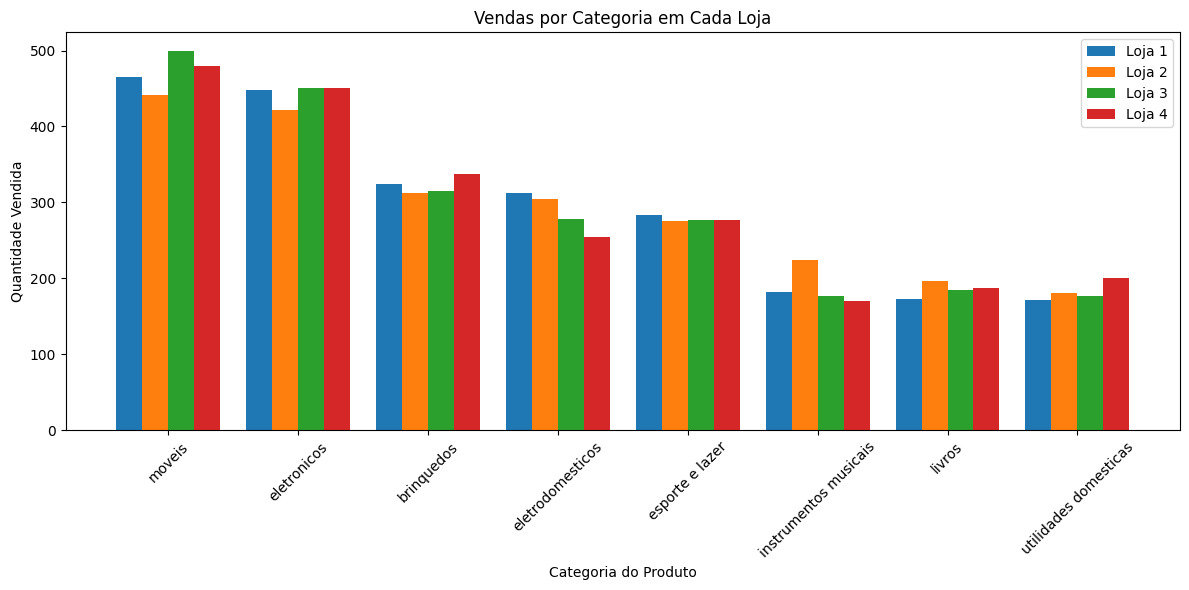

In [23]:
import matplotlib.pyplot as plt

# Unificando os dados em um √∫nico DataFrame para facilitar a compara√ß√£o
df_categorias = categorias_loja1.merge(
    categorias_loja2, on="Categoria", how="outer"
).merge(
    categorias_loja3, on="Categoria", how="outer"
).merge(
    categorias_loja4, on="Categoria", how="outer"
)

# Substituindo valores nulos por 0 e ordenando pelas vendas da Loja 1
df_categorias.fillna(0, inplace=True)
df_categorias = df_categorias.sort_values(by="Quantidade Vendida - Loja 1", ascending=False)

# Configura√ß√£o do gr√°fico
plt.figure(figsize=(12, 6))
largura = 0.2
x = range(len(df_categorias))

plt.bar([p - 1.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 1"], width=largura, label="Loja 1")
plt.bar([p - 0.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 2"], width=largura, label="Loja 2")
plt.bar([p + 0.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 3"], width=largura, label="Loja 3")
plt.bar([p + 1.5*largura for p in x], df_categorias["Quantidade Vendida - Loja 4"], width=largura, label="Loja 4")

plt.xticks(ticks=x, labels=df_categorias["Categoria"], rotation=45)
plt.title("Vendas por Categoria em Cada Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade Vendida")
plt.legend()
plt.tight_layout()
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

In [31]:
# Calculando a m√©dia das avalia√ß√µes de cada loja
media_avaliacoes = {
    "Loja 1": loja["Avalia√ß√£o da compra"].mean(),
    "Loja 2": loja2["Avalia√ß√£o da compra"].mean(),
    "Loja 3": loja3["Avalia√ß√£o da compra"].mean(),
    "Loja 4": loja4["Avalia√ß√£o da compra"].mean()
}

# Transformando em DataFrame para visualiza√ß√£o
df_media_avaliacoes = pd.DataFrame(
    list(media_avaliacoes.items()),
    columns=["Loja", "M√©dia de Avalia√ß√£o"]
)

# Ordenando da maior para a menor m√©dia
df_media_avaliacoes = df_media_avaliacoes.sort_values(
    by="M√©dia de Avalia√ß√£o", ascending=False
)

# Exibindo o resultado
print(df_media_avaliacoes)

     Loja  M√©dia de Avalia√ß√£o
2  Loja 3            4.048326
1  Loja 2            4.037304
3  Loja 4            3.995759
0  Loja 1            3.976685


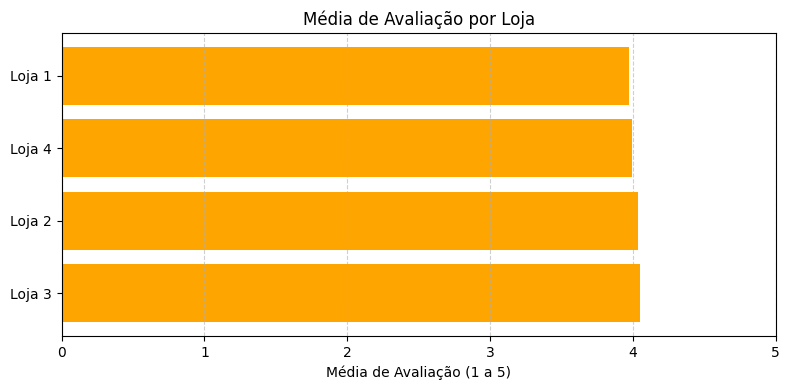

In [44]:
# Gr√°fico de Barras Horizontais - M√©dia de Avalia√ß√£o por Loja

plt.figure(figsize=(8, 4))
plt.barh(df_media_avaliacoes["Loja"], df_media_avaliacoes["M√©dia de Avalia√ß√£o"], color="orange")
plt.title("M√©dia de Avalia√ß√£o por Loja")
plt.xlabel("M√©dia de Avalia√ß√£o (1 a 5)")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [34]:
# Produtos mais vendidos (top 5) e menos vendidos (bottom 5) por loja
# A fun√ß√£o value_counts() conta quantas vezes cada produto aparece

# Loja 1
mais_vendidos_loja1 = loja["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja1 = loja["Produto"].value_counts().tail(5).reset_index()

# Loja 2
mais_vendidos_loja2 = loja2["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja2 = loja2["Produto"].value_counts().tail(5).reset_index()

# Loja 3
mais_vendidos_loja3 = loja3["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja3 = loja3["Produto"].value_counts().tail(5).reset_index()

# Loja 4
mais_vendidos_loja4 = loja4["Produto"].value_counts().head(5).reset_index()
menos_vendidos_loja4 = loja4["Produto"].value_counts().tail(5).reset_index()

# Renomeando colunas para melhor leitura
for df in [mais_vendidos_loja1, menos_vendidos_loja1,
           mais_vendidos_loja2, menos_vendidos_loja2,
           mais_vendidos_loja3, menos_vendidos_loja3,
           mais_vendidos_loja4, menos_vendidos_loja4]:
    df.columns = ["Produto", "Quantidade Vendida"]

# Exibindo os resultados de cada Loja
print("Top 5 produtos mais vendidos - Loja 1")
display(mais_vendidos_loja1)

print("Top 5 produtos menos vendidos - Loja 1")
display(menos_vendidos_loja1)

print("Top 5 produtos mais vendidos - Loja 2")
display(mais_vendidos_loja2)

print("Top 5 produtos menos vendidos - Loja 2")
display(menos_vendidos_loja2)

print("Top 5 produtos mais vendidos - Loja 3")
display(mais_vendidos_loja3)

print("Top 5 produtos menos vendidos - Loja 3")
display(menos_vendidos_loja3)

print("Top 5 produtos mais vendidos - Loja 4")
display(mais_vendidos_loja4)

print("Top 5 produtos menos vendidos - Loja 4")
display(menos_vendidos_loja4)

Top 5 produtos mais vendidos - Loja 1


Produto  Quantidade Vendida
0         Micro-ondas                  60
1       TV Led UHD 4K                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4              C√¥moda                  56

Top 5 produtos menos vendidos - Loja 1


Produto  Quantidade Vendida
0  Ci√™ncia de dados com python                  39
1                     Pandeiro                  36
2            Panela de press√£o                  35
3                      Headset                  33
4                 Celular ABXY                  33

Top 5 produtos mais vendidos - Loja 2


Produto  Quantidade Vendida
0  Iniciando em programa√ß√£o                  65
1               Micro-ondas                  62
2                   Bateria                  61
3                    Viol√£o                  58
4                  Pandeiro                  58

Top 5 produtos menos vendidos - Loja 2


Produto  Quantidade Vendida
0     Fone de ouvido                  37
1           Poltrona                  35
2     Mesa de jantar                  34
3         Impressora                  34
4  Jogo de tabuleiro                  32

Top 5 produtos mais vendidos - Loja 3


Produto  Quantidade Vendida
0    Kit banquetas                  57
1   Mesa de jantar                  56
2        Cama king                  56
3  Jogo de panelas                  55
4           C√¥moda                  55

Top 5 produtos menos vendidos - Loja 3


Produto  Quantidade Vendida
0          Guitarra                  38
1     Jogo de copos                  36
2           Mochila                  36
3       Micro-ondas                  36
4  Blocos de montar                  35

Top 5 produtos mais vendidos - Loja 4


Produto  Quantidade Vendida
0                  Cama box                  62
1                  Faqueiro                  59
2   Dashboards com Power BI                  56
3                 Cama king                  56
4  Carrinho controle remoto                  55

Top 5 produtos menos vendidos - Loja 4


Produto  Quantidade Vendida
0                    Geladeira                  38
1  Ci√™ncia de dados com python                  38
2                       Viol√£o                  37
3                Guarda roupas                  34
4                     Guitarra                  33

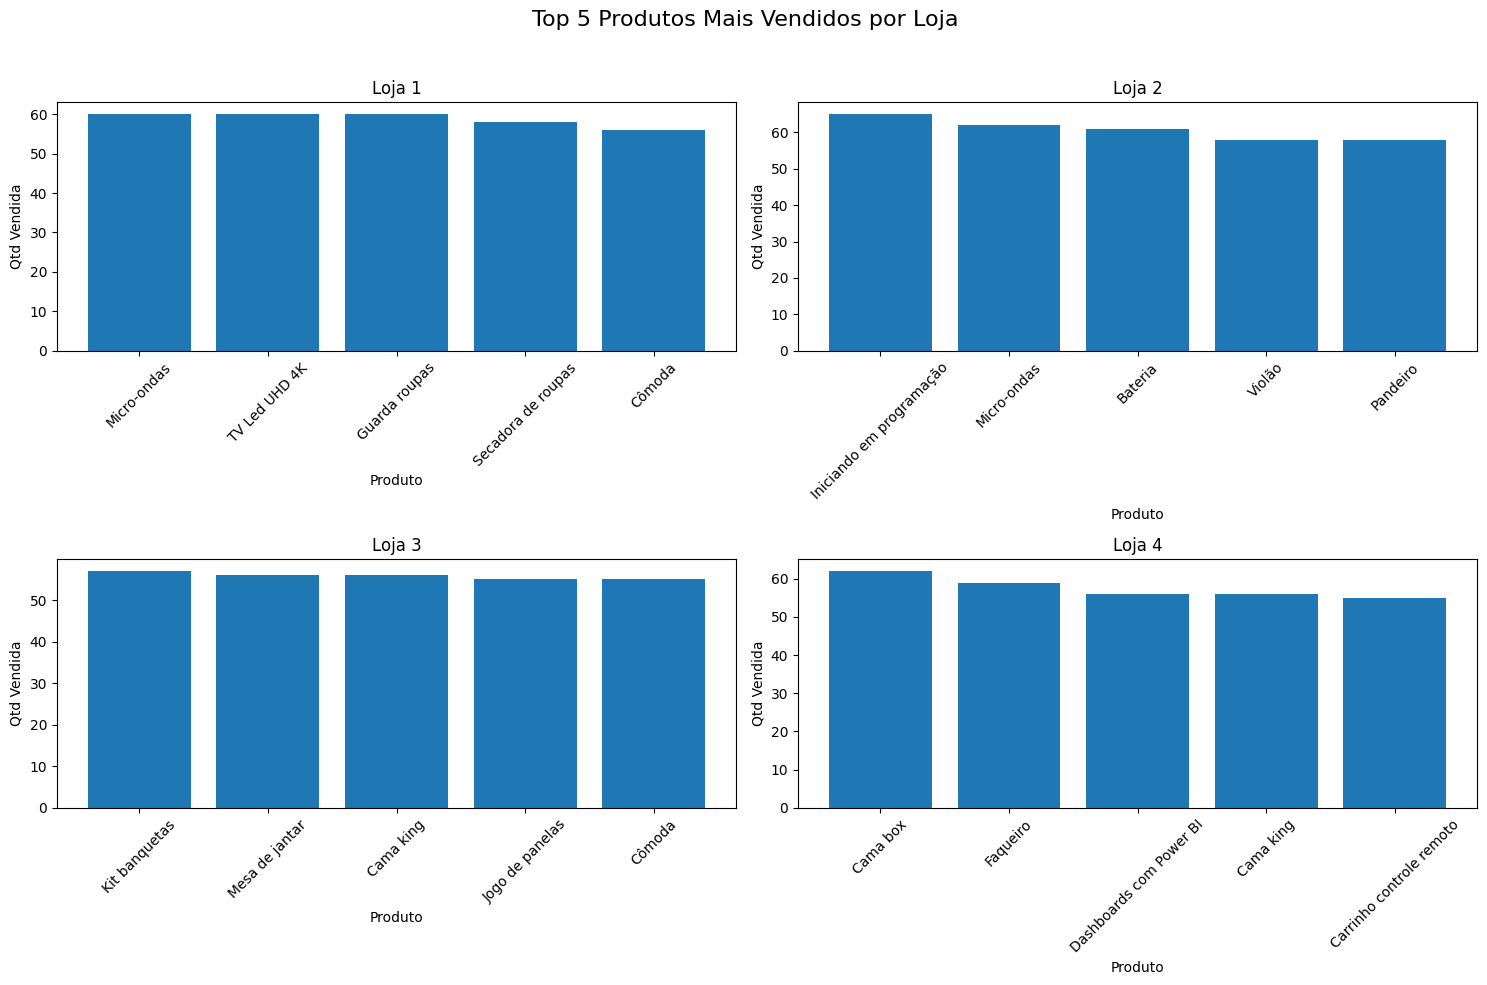

In [37]:
# Gr√°fico de barras - Top 5 Produtos Mais Vendidos da Loja 1
# plt.figure(figsize=(10, 5))
# plt.bar(mais_vendidos_loja1["Produto"], mais_vendidos_loja1["Quantidade Vendida"])
# plt.title("Top 5 Produtos Mais Vendidos - Loja 1")
# plt.xlabel("Produto")
# plt.ylabel("Quantidade Vendida")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Gr√°fico comparativo - Top 5 Produtos Mais Vendidos por Loja

import matplotlib.pyplot as plt

# Criando 4 subplots para as 4 lojas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Top 5 Produtos Mais Vendidos por Loja", fontsize=16)

# Loja 1
axs[0, 0].bar(mais_vendidos_loja1["Produto"], mais_vendidos_loja1["Quantidade Vendida"])
axs[0, 0].set_title("Loja 1")
axs[0, 0].set_xlabel("Produto")
axs[0, 0].set_ylabel("Qtd Vendida")
axs[0, 0].tick_params(axis='x', rotation=45)

# Loja 2
axs[0, 1].bar(mais_vendidos_loja2["Produto"], mais_vendidos_loja2["Quantidade Vendida"])
axs[0, 1].set_title("Loja 2")
axs[0, 1].set_xlabel("Produto")
axs[0, 1].set_ylabel("Qtd Vendida")
axs[0, 1].tick_params(axis='x', rotation=45)

# Loja 3
axs[1, 0].bar(mais_vendidos_loja3["Produto"], mais_vendidos_loja3["Quantidade Vendida"])
axs[1, 0].set_title("Loja 3")
axs[1, 0].set_xlabel("Produto")
axs[1, 0].set_ylabel("Qtd Vendida")
axs[1, 0].tick_params(axis='x', rotation=45)

# Loja 4
axs[1, 1].bar(mais_vendidos_loja4["Produto"], mais_vendidos_loja4["Quantidade Vendida"])
axs[1, 1].set_title("Loja 4")
axs[1, 1].set_xlabel("Produto")
axs[1, 1].set_ylabel("Qtd Vendida")
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajuste do layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 5. Frete M√©dio por Loja


In [40]:
# 8. Frete M√©dio por Loja

# Calculando o custo m√©dio de frete para cada loja
frete_medio = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

# Transformando em DataFrame para visualiza√ß√£o
df_frete_medio = pd.DataFrame(
    list(frete_medio.items()),
    columns=["Loja", "Frete M√©dio (R$)"]
)

# Ordenando do maior para o menor
df_frete_medio = df_frete_medio.sort_values(
    by="Frete M√©dio (R$)", ascending=False
)

# Exibindo o resultado
print(df_frete_medio)

     Loja  Frete M√©dio (R$)
0  Loja 1         34.691805
1  Loja 2         33.621941
2  Loja 3         33.074464
3  Loja 4         31.278997


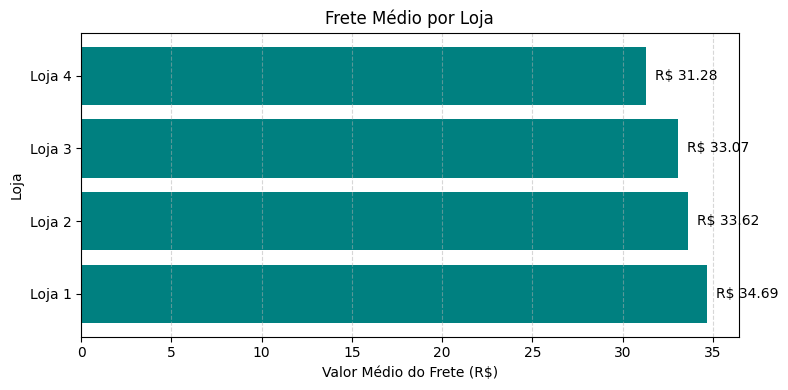

In [48]:
# Gr√°fico de barras horizontais - Frete M√©dio por Loja

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(df_frete_medio["Loja"], df_frete_medio["Frete M√©dio (R$)"], color="teal")
plt.title("Frete M√©dio por Loja")
plt.xlabel("Valor M√©dio do Frete (R$)")
plt.ylabel("Loja")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adicionando os valores ao lado das barras
for index, value in enumerate(df_frete_medio["Frete M√©dio (R$)"]):
    plt.text(
        value + 0.5,                            # posi√ß√£o no eixo x (levemente √† direita da barra)
        index,                                  # posi√ß√£o no eixo y
        f"R$ {value:.2f}",                      # formato em reais com duas casas decimais
        va='center',                            # alinhamento vertical
        fontsize=10
    )

plt.tight_layout()
plt.show()

# 6. Relat√≥rio Final

# üìä Recomenda√ß√£o de Venda de Loja

## üß≠ Introdu√ß√£o

O objetivo deste relat√≥rio √© auxiliar o Senhor Jo√£o, propriet√°rio da rede Alura Store, na decis√£o estrat√©gica de **vender uma de suas quatro lojas**. Com base na an√°lise de dados de vendas, avalia√ß√µes de clientes e custos log√≠sticos, buscamos identificar a loja com **menor efici√™ncia geral**, a fim de maximizar o desempenho da rede como um todo.

Foram analisados os seguintes crit√©rios:
- Faturamento total
- Categorias de produtos mais vendidas
- M√©dia das avalia√ß√µes de clientes
- Produtos mais e menos vendidos
- Custo m√©dio de frete

## üìà Desenvolvimento da An√°lise

### üí∞ **Faturamento Total**
A **Loja 1** apresentou o maior faturamento, seguida por Loja 2, Loja 3 e **Loja 4** (que teve o menor). Isso indica que a Loja 4 possui menor desempenho de vendas.

### üõí **Categorias de Produtos Vendidas**
Todas as lojas t√™m como destaque as categorias **m√≥veis, eletr√¥nicos e eletrodom√©sticos**, com pequenas varia√ß√µes. No entanto, a **Loja 4** mostrou menor diversidade no volume de vendas entre categorias.

### ‚≠ê **M√©dia de Avalia√ß√£o dos Clientes**
A Loja 1 tamb√©m se destaca com a **maior m√©dia de avalia√ß√£o**, refletindo maior satisfa√ß√£o dos clientes. Por outro lado, a **Loja 4** obteve a **pior m√©dia**, indicando potenciais problemas de experi√™ncia do consumidor.

### üèÜ **Produtos Mais e Menos Vendidos**
- A Loja 1 vendeu consistentemente produtos com boa rotatividade como **TV Led 4K, micro-ondas e guarda-roupas**.
- A Loja 4 teve produtos com vendas bem mais baixas, o que pode indicar menor popularidade ou visibilidade dos itens ofertados.

### üöö **Frete M√©dio**
A **Loja 4 apresentou o menor frete m√©dio**, o que seria um ponto positivo. No entanto, esse custo menor **n√£o foi suficiente** para compensar a baixa performance de vendas e satisfa√ß√£o do cliente.

## ‚úÖ Conclus√£o e Recomenda√ß√£o

Com base em todos os fatores analisados, **recomendamos que o Senhor Jo√£o venda a Loja 4**. A decis√£o √© justificada por:

- **Menor faturamento entre todas as lojas**
- **Pior m√©dia de avalia√ß√µes de clientes**
- **Produtos com baixa performance de venda**
- **Menor destaque nas categorias de alto giro**

Apesar do frete m√©dio mais baixo, os dados sugerem que a Loja 4 apresenta **baixa efici√™ncia comercial e operacional**, o que torna essa unidade a mais adequada para descontinua√ß√£o ou venda.

Com a venda da Loja 4, o Senhor Jo√£o poder√° focar seus recursos e esfor√ßos nas lojas com maior potencial de crescimento, otimizando os resultados da rede como um todo.
